In [36]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

In [ ]:
dataDir = './data/coco'
dataType = 'train2017'
annFile = '{}/annotations/instances_{}.json'.format(dataDir, dataType)

In [ ]:
coco = COCO(annFile)

In [ ]:
## Classes
classes = coco.loadCats(coco.getCatIds())
print(type(classes)) ## List of dictionaries -- [{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}]
# print(classes)    

In [ ]:
print ("All sub-classes -->")
for cls_dict in classes:
    print (cls_dict['name'])

In [ ]:
print ("All super-classes -->")
super_classes = set([cls_dict['supercategory'] for cls_dict in classes])
for cnm in super_classes:
    print(cnm)

In [76]:
## Get all images containing given categories

## Person only
person_id = coco.getCatIds(catNms=['person'])
print(person_id, end=" ")
person_img_ids = coco.getImgIds(catIds=person_id);
print(len(person_img_ids))

## Dog only
dog_id = coco.getCatIds(catNms=['dog'])
print(dog_id, end=" ")
dog_img_ids = coco.getImgIds(catIds=dog_id);
print(len(dog_img_ids))

## Person and dog
class_ids = person_id + dog_id
img_ids = coco.getImgIds(catIds=class_ids)
print(class_ids, end=" ")
print(len(img_ids))

[1] 64115
[18] 4385
[1, 18] 2049


{'license': 3, 'file_name': '000000042169.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000042169.jpg', 'height': 640, 'width': 395, 'date_captured': '2013-11-18 03:10:50', 'flickr_url': 'http://farm3.staticflickr.com/2783/4336917535_80a2e8bd96_z.jpg', 'id': 42169}


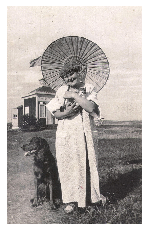

In [79]:
## Select random img
img = coco.loadImgs(img_ids[np.random.randint(0, len(img_ids))])[0]
print(img)
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[6897, 188870]


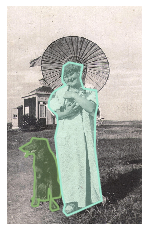

In [82]:
plt.imshow(I); plt.axis('off')
ann_ids = coco.getAnnIds(imgIds=img['id'], catIds=class_ids, iscrowd=None)
print(ann_ids)
anns = coco.loadAnns(ann_ids)
coco.showAnns(anns)

In [84]:
# Keypoint annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir, dataType)
coco_kps = COCO(annFile)

loading annotations into memory...
Done (t=10.78s)
creating index...
index created!


[188870]


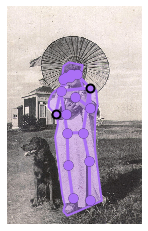

In [85]:

plt.imshow(I)
plt.axis('off')
ax = plt.gca()

ann_ids = coco_kps.getAnnIds(imgIds=img['id'], catIds=class_ids, iscrowd=None)
print(ann_ids)
anns = coco_kps.loadAnns(ann_ids)
coco_kps.showAnns(anns)

In [87]:
# Load caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir, dataType)
coco_caps = COCO(annFile)

loading annotations into memory...
Done (t=4.49s)
creating index...
index created!


A woman with a cat and dog posing near a house.
A woman posing for a picture with her cat and dog.
A woman holding an umbrella standing next to a black dog.
A girl with a dog beside her, holds a kitten and an umbrella
An old lady holding an umbrella by a dog.


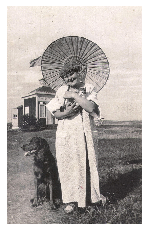

In [89]:
# Load and display caption annotations
ann_ids = coco_caps.getAnnIds(imgIds=img['id'])
anns = coco_caps.loadAnns(ann_ids)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()